In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier 
from sklearn import metrics, preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [29]:
# Loading Dataset
df = pd.read_csv("train.csv")

# Some basic stats on the target variable
print('# startup failed = {}'.format(len(df[df['failure'] == 1])))
print('# startup succeed = {}'.format(len(df[df['failure'] == 0])))
print('% startup failed = {}%'.format(round(float(len(df[df['failure'] == 1])) / len(df) * 100), 3))

asm_test = pd.read_csv('assignment-test.csv')

df.head()

# startup failed = 1309
# startup succeed = 4935
% startup failed = 21%


,index,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,...,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,failure
0,0,C,1,7370.0,A,1.0765,0.3440,0.9668,12.2879,-3.2781,...,-6.7607,-4.1982,1.3114,-26.9584,592.2480,-6.8281,-17.6852,-2.4004,-2.8542,1
1,1,G,1,7311.0,I,0.9491,0.4979,0.9931,26.4671,12.5153,...,11.3881,6.6235,0.6600,27.3261,-21.2377,5.0302,13.7213,1.5718,1.5959,0
2,2,F,1,7311.0,I,1.1346,0.4562,0.9971,9.7338,9.7510,...,9.7007,6.2549,0.5155,20.7865,-41.3345,3.4430,10.2847,0.2361,0.1441,1
3,3,G,0,3663.0,A,1.4592,0.2219,0.3824,29.2791,2.0565,...,-3.0989,-3.8490,1.0678,7.1981,13.0564,2.7667,5.6007,-1.2803,-1.2512,0
4,4,G,1,6798.0,G,1.1802,0.6234,1.6704,65.4186,30.7321,...,8.7586,2.7479,0.1391,0.8644,-2.9512,0.2913,0.3255,1.2604,0.9888,1


In [30]:
df['attr1'] = '1_' + df['attr1'].astype(str)
df['attr4'] = '4_' + df['attr4'].astype(str)

# Create 'attr1' dummies and join
one_hot_attr1 = pd.get_dummies(df['attr1'])
df = df.join(one_hot_attr1)

# Create 'attr4' dummies and join
one_hot_attr4 = pd.get_dummies(df['attr4'])
df = df.join(one_hot_attr4)

df = df.drop(['attr1', 'attr4', 'attr10'], axis=1)
df.head()

,index,attr2,attr3,attr5,attr6,attr7,attr8,attr9,attr11,attr12,...,4_C,4_D,4_E,4_F,4_G,4_H,4_I,4_J,4_K,4_L
0,0,1,7370.0,1.0765,0.3440,0.9668,12.2879,-3.2781,6.0656,-6.7607,...,0,0,0,0,0,0,0,0,0,0
1,1,1,7311.0,0.9491,0.4979,0.9931,26.4671,12.5153,14.4181,11.3881,...,0,0,0,0,0,0,1,0,0,0
2,2,1,7311.0,1.1346,0.4562,0.9971,9.7338,9.7510,12.5399,9.7007,...,0,0,0,0,0,0,1,0,0,0
3,3,0,3663.0,1.4592,0.2219,0.3824,29.2791,2.0565,2.0565,-3.0989,...,0,0,0,0,0,0,0,0,0,0
4,4,1,6798.0,1.1802,0.6234,1.6704,65.4186,30.7321,60.0642,8.7586,...,0,0,0,0,1,0,0,0,0,0


In [31]:
# Randomly, split the data into test/training/validation sets
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

# Separate target and predictors
y_train = train['failure']
x_train = train.drop(['failure'], axis=1)
y_test = test['failure']
x_test = test.drop(['failure'], axis=1)
y_validate = validate['failure']
x_validate = validate.drop(['failure'], axis=1)

In [32]:
adaModel = AdaBoostClassifier(n_estimators = 150, learning_rate = 1.5) #too long if have too many weak estimators
adaModel = adaModel.fit(x_train, y_train)   

In [33]:
# Prepend string prior to encoding
asm_test['attr1'] = '1_' + asm_test['attr1'].astype(str)
asm_test['attr4'] = '4_' + asm_test['attr4'].astype(str)

# Create 'attr1' dummies and join
one_hot_attr1 = pd.get_dummies(asm_test['attr1'])
asm_test = asm_test.join(one_hot_attr1)

# Create 'attr4' dummies and join
one_hot_attr4 = pd.get_dummies(asm_test['attr4'])
asm_test = asm_test.join(one_hot_attr4)

asm_test = asm_test.drop(['attr1', 'attr4', 'attr10'], axis=1)

In [34]:
# scaler = StandardScaler()
# scaler.fit(asm_test)
# asm_test = scaler.transform(asm_test)

In [35]:
prediction = pd.DataFrame(adaModel.predict(asm_test))
# print(prediction)
df_output = asm_test[["index"]]
df_output2 = df_output.assign(failure = prediction)
df_output2.to_csv("adaboost3.csv")

df_output2.head()

,index,failure
0,6244,0
1,6245,0
2,6246,1
3,6247,1
4,6248,0


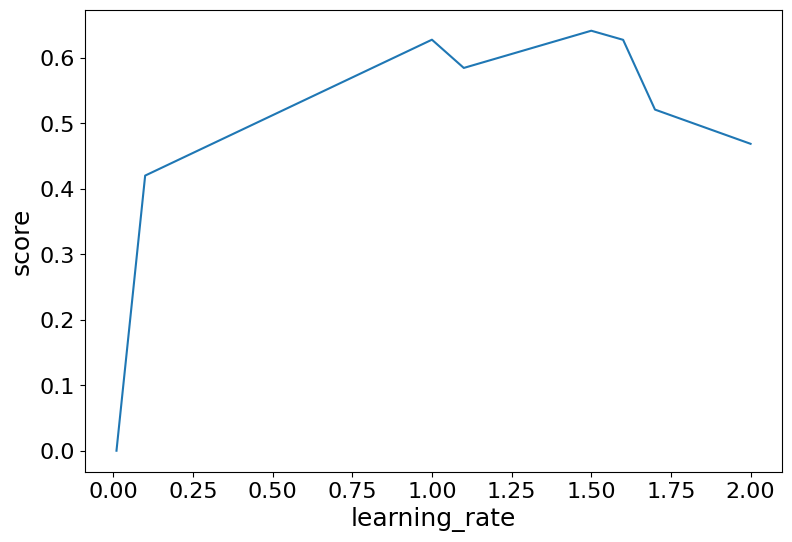

In [36]:
#plot graph
#estimator_range = [50,100,150,200,250]
#time = [0.4,0.9,1.3, 1.7, 2.1]
#learning rate is 1 for now
learningrate = [0.01, 0.1, 1, 1.1, 1.5, 1.6, 1.7, 2]
scores = [0, 0.4201312910284464, 0.6276463262764632, 0.5845272206303724, 0.6413502109704642, 0.6274509803921569, 0.520912547528517, 0.4686648501362398]
#scores = [0.5176908752327747, 0.5868055555555555, 0.6276463262764632, 0.5948717948717949, 0.590339892665474]


plt.figure(figsize=(9,6))
plt.plot(learningrate, scores)

plt.xlabel("learning_rate", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()